In [16]:
# import libraries


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as ptly

### Visualisations:


In [16]:
data = pd.read_csv("falcon_9_wrangled_data.csv")

data.head(1)


,FlightNumber,date,BoosterVersion,PayloadMass,LaunchSite,Latitude,Longitude,Orbit,Flights,Reused,GridFins,Legs,LandingPad,ReusedCount,Serial,Block,Outcome,class
0,1,2010-06-04,Falcon 9,8183.607718,CCSFS SLC 40,28.561857,-80.577366,LEO,1.0,False,False,False,NaN,0.0,B0003,1.0,None None,0


1. launches frequencies by months 
2. launches by launchsite
3. launchsite orbits
4. payload distribution vs ORbits
5. frequency of reusability vs time
6. pad used vs landing 
7. launchsite vs success over time
8. launchsite vs failure over time
9. payload Mass vs Success over time
10. payload Mass vs Failure over time




### 2 - Visualisation

1. launches frequencies by months 
2. launches by launchsite
3. launchsite orbits
4. payload distribution vs ORbits
5. frequency of reusability vs time
6. pad used vs landing 
7. launchsite vs success over time
8. launchsite vs failure over time
9. payload Mass vs Success over time
10. payload Mass vs Failure over time

#### 1. Launch frequencies by Months

In [26]:
vis_data = pd.read_csv("falcon_9_wrangled_data.csv")
vis_data.head(2)

,FlightNumber,date,BoosterVersion,PayloadMass,LaunchSite,Latitude,Longitude,Orbit,Flights,Reused,GridFins,Legs,LandingPad,ReusedCount,Serial,Block,Outcome,class
0,1,2010-06-04,Falcon 9,8183.607718,CCSFS SLC 40,28.561857,-80.577366,LEO,1.0,False,False,False,NaN,0.0,B0003,1.0,None None,0
1,2,2012-05-22,Falcon 9,525.000000,CCSFS SLC 40,28.561857,-80.577366,LEO,1.0,False,False,False,NaN,0.0,B0005,1.0,None None,0


In [27]:
vis_data["date"] = pd.to_datetime(vis_data["date"])
vis_data['month'] = vis_data['date'].dt.strftime("%Y-%m")

month_counts = vis_data.groupby('month').size().reset_index(name='count')


fig = ptly.bar(month_counts, x='month', y='count', title= 'Number of Launch by Months')

fig.show()


### 2. Launches Distribution by LaunchSites

LaunchSite
CCSFS SLC 40    93
KSC LC 39A      48
VAFB SLC 4E     26
Name: count, dtype: int64


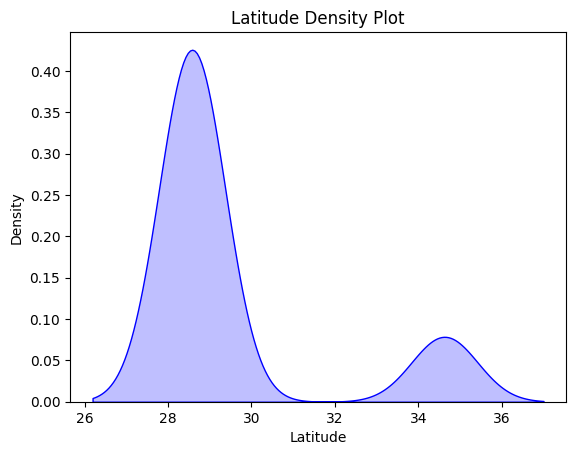

In [28]:
import seaborn as sns

vis_data = pd.read_csv("falcon_9_wrangled_data.csv")

latitude_list = vis_data['Latitude'].to_list()
longitude_list= vis_data['Longitude'].to_list()
launch_site_unique = vis_data['LaunchSite'].value_counts()


print(launch_site_unique)

#Density Plot (Kernel Density Estimate)
plt.subplot(1, 1, 1)
sns.kdeplot(latitude_list, fill=True, color='blue')
plt.title("Latitude Density Plot")
plt.xlabel("Latitude")
plt.ylabel("Density")


plt.show()

In [79]:
import folium
unique_coord = list(set(zip(latitude_list, longitude_list)))    # listing down all Unique launchsites

geo_map = folium.Map(
    location= [np.mean(latitude_list), np.mean(longitude_list)],
    zoom_start=4
    )

for lat, lon in unique_coord:
    folium.Marker([lat, lon]).add_to(geo_map)


geo_map

### 3. LaunchSite Vs Oribit of Flight

In [35]:
vis_data = pd.read_csv("falcon_9_wrangled_data.csv")

fig = ptly.scatter(vis_data, x='LaunchSite' , y='Orbit' , color='LaunchSite')

fig.show()



### 4. Payload Distribution vs Orbit

In [ ]:
fig = ptly.bar(vis_data, x='Orbit', y='PayloadMass', color='class')
fig.show()

# GTO orbit flights are more prone to unsuccessful; why? 

In [54]:
fig = ptly.bar(vis_data[vis_data['class']==0], x='Orbit', y='PayloadMass', color='LaunchSite', title='Analysis of Failed Launches')
fig.show()


# shows that CCSFS SLC 40 Launch Station has been more prone to failed launches

### 5. Reusability of Flight vs Time 

In [78]:
vis_data["date"] = pd.to_datetime(vis_data["date"])
vis_data['month'] = vis_data['date'].dt.strftime("%Y-%m")

fig=ptly.bar(vis_data[vis_data['Reused']==1], 
                 x='month' , y='ReusedCount', 
                 color='class',
                 color_continuous_scale='RdYlGn',
                 title='Number of Reusable Booster Mission by Months')
fig.show()

### 6. 